In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
import nltk
#nltk.download('punkt') # Install first time

# Generate word frequency list from NOS news articles

In [4]:
subfolder_name = 'raw'
csv_file_name = 'dutch-news-articles.csv'
csv_file_path = os.path.join(os.getcwd(), subfolder_name, csv_file_name)

chunk_size = 10000

# Tokenize a string of words and remove symbols and numerals
def tokenize_and_clean(text):
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
    return cleaned_tokens

In [5]:
# Measure the time it takes to read the CSV file in chunks
start_time = time.time()

# Import csv in chunks
df_chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

all_tokens = [] # Containing strings from all chunks

for df in df_chunks:
    # Tokenize and clean the text in the third column
    # for each row of the dataframe
    tokens_list = [] # Nested list of strings in single chunk

    for text in df.iloc[:,2]:
        tokens = tokenize_and_clean(text)
        tokens_list.append(tokens)
        
    # Remove any empty lists from tokens_list
    tokens_list = [x for x in tokens_list if x]
    
    # Append the cleaned tokens list to the all_tokens list
    all_tokens.extend(tokens_list)
    
# Flatten the nested list
merged_list = [item for sublist in all_tokens for item in sublist]

end_time = time.time()

total_time_chunks = end_time - start_time

In [6]:
# Generate frequency table
freq_table = pd.Series(merged_list).value_counts()
freq_df = pd.DataFrame({'string': freq_table.index, 'count':freq_table.values})
freq_df = freq_df.sort_values('count', ascending=False)

In [8]:
# Print the most frequent words
#print(freq_df.head(20))

In [7]:
out_subfolder_name = 'data'
out_file_name = 'word_freq_dutch-news-articles.csv'
out_file_path = os.path.join(os.getcwd(), out_subfolder_name, out_file_name)

freq_df.to_csv(out_file_path, index=False)

# Explore and visualize the word statistics

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
threshold = 1000

In [10]:
# Rank 1 - 5
freq_df.iloc[:threshold, :].head(10)

,string,count
0,de,4325094
1,het,2018459
2,van,1905087
3,een,1568353
4,in,1566942
5,en,1170966
6,dat,1073303
7,is,918625
8,op,753944
9,zijn,678301


In [11]:
# Rank 995 - 999
freq_df.iloc[:threshold, :].tail(10)

,string,count
990,boord,6138
991,coalitie,6129
992,interview,6113
993,tegenover,6110
994,neer,6092
995,wereldwijd,6082
996,oog,6073
997,centrale,6068
998,onlangs,6066
999,banen,6057


In [12]:
# Check if there's any entry with same count as the threshold entry
count_threshold = int(freq_df.iloc[(threshold-1):threshold, 1])
freq_df[freq_df['count'] == count_threshold]

,string,count
999,banen,6057


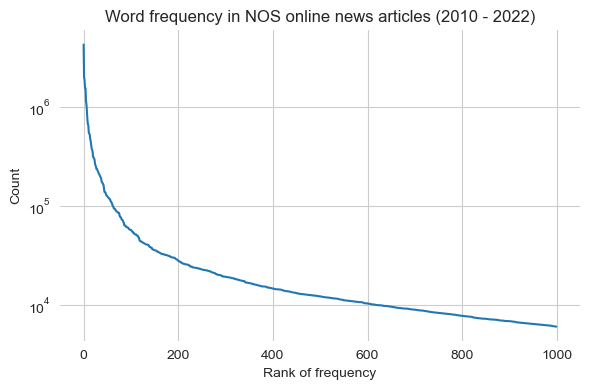

In [85]:
plot_df = freq_df.iloc[:threshold, :]

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.lineplot(
    data=plot_df, x=plot_df.index, y='count'
)

sns.despine(left=True, bottom=True)

plt.title('Word frequency in NOS online news articles (2010 - 2022)')
plt.xlabel('Rank of frequency')
plt.ylabel('Count')
plt.yscale('log')

plt.tight_layout()

plt.show()

In [83]:
# Save plot
out_subfolder_name = 'fig'
out_file_name = 'word_freq_line.png'
out_file_path = os.path.join(os.getcwd(), out_subfolder_name, out_file_name)

fig.savefig(out_file_path)

# Works to do
- More meaningful contents for flashcards
    - Scrap from dictionary e.g. woordenboek.org or other reliable sources that the flashcards also come with the following:
        1. Definition / explaination for the word. Need to deal with multiple meanings.
        2. The article (de vs het) corresponding to nouns and append to the flashcard. Article is so important yet irregular enough that can benefit from spaced repetition / memory practice

- More stats
     1. Further check the statistics of the most frequent words by their grammatical function
     2. Find out the "trend words" of the year i.e. excluding most common ones

- Word list from dutch lessons
     1. 1000 most common words from Bart de Pau
     2. Dutchies to be transcripts

- Ideas specific / theme based word list
     1. Politics e.g. political speech, eerste kamer etc.
     2. Economics and finance
     3. Engineering
     4. Statistics
     5. Commercial
     6. Voorbelen voor inburgeringsexamen
     7. Corpus from hmmm... 
     8. Books in public domain?
     9. Focus on news title instead of news content
     10. Recipe or boodschappen inspired by geheugentreiner
     11. Particular text
     12. Music lyrics
     
- Implement the flashcard using streamlit / react